In [ ]:
!pip install kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


**Import Face Mask Dataset**

In [ ]:
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 92% 150M/163M [00:02<00:00, 70.4MB/s]
100% 163M/163M [00:02<00:00, 77.5MB/s]


In [ ]:
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
!ls

data  face-mask-dataset.zip  sample_data


**Importing the dependencies**

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_3254.jpg', 'with_mask_240.jpg', 'with_mask_3045.jpg', 'with_mask_672.jpg', 'with_mask_84.jpg']
['with_mask_2699.jpg', 'with_mask_2910.jpg', 'with_mask_961.jpg', 'with_mask_1403.jpg', 'with_mask_3613.jpg']


In [ ]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_802.jpg', 'without_mask_1100.jpg', 'without_mask_1370.jpg', 'without_mask_3293.jpg', 'without_mask_2467.jpg']
['without_mask_3.jpg', 'without_mask_1717.jpg', 'without_mask_1859.jpg', 'without_mask_857.jpg', 'without_mask_725.jpg']


In [ ]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


**Creating label for 2 class of images**                                                                    
with mask --> 1                                                                
without mask --> 0

In [ ]:
with_mask_labels = [1]*3725
without_mask_labels = [0]*3828

In [ ]:
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [ ]:
labels = with_mask_labels + without_mask_labels
print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying of tha images**

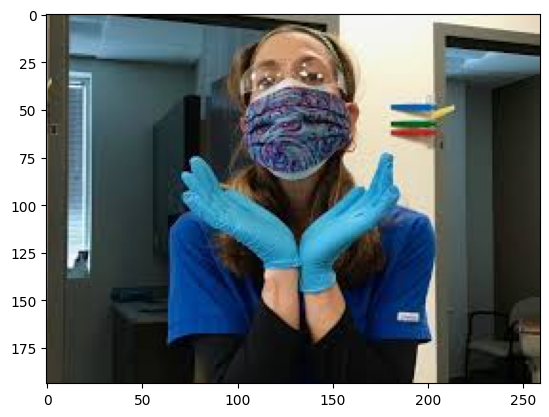

In [ ]:
img = mpimg.imread('/content/data/with_mask/with_mask_2699.jpg')
imgplot = plt.imshow(img)
plt.show()

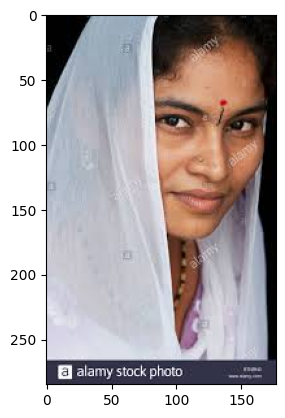

In [ ]:
img = mpimg.imread('/content/data/without_mask/without_mask_1717.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image processing**                     
1. Resize the Images
2. Convert the images to numpy arrays

In [ ]:
with_mask_path = '/content/data/with_mask/'
data = []
for img_file in with_mask_files:
  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)
without_mask_path = '/content/data/without_mask/'
for img_file in without_mask_files:
  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
type(data)

list

In [ ]:
len(data)

7553

array([[[164, 148, 125],
        [164, 148, 125],
        [164, 148, 125],
        ...,
        [153, 137, 112],
        [152, 136, 111],
        [151, 135, 110]],

       [[164, 148, 125],
        [164, 148, 125],
        [164, 148, 125],
        ...,
        [154, 138, 113],
        [153, 137, 112],
        [152, 136, 111]],

       [[165, 149, 126],
        [165, 149, 126],
        [165, 149, 126],
        ...,
        [155, 139, 114],
        [154, 138, 113],
        [153, 137, 112]],

       ...,

       [[166, 170, 179],
        [162, 166, 175],
        [161, 165, 174],
        ...,
        [254, 254, 246],
        [254, 254, 246],
        [254, 254, 246]],

       [[167, 171, 180],
        [164, 168, 177],
        [162, 166, 175],
        ...,
        [254, 254, 245],
        [254, 254, 245],
        [254, 254, 245]],

       [[166, 170, 179],
        [162, 166, 175],
        [161, 165, 174],
        ...,
        [254, 254, 244],
        [254, 254, 244],
        [254, 254, 244]]], dtype=uint8)
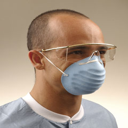

In [ ]:
data[0]

In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
data[0].shape

(128, 128, 3)

In [ ]:
X = np.array(data)
Y = np.array(labels)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
type(Y)

numpy.ndarray

In [ ]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [ ]:
print(Y)

[1 1 1 ... 0 0 0]


**Train Test Split**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [ ]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

array([[[206, 211, 230],
        [209, 214, 233],
        [209, 215, 234],
        ...,
        [169, 173, 180],
        [187, 190, 196],
        [206, 209, 214]],

       [[210, 215, 236],
        [213, 218, 238],
        [214, 220, 240],
        ...,
        [173, 176, 185],
        [183, 186, 192],
        [195, 198, 204]],

       [[208, 214, 237],
        [208, 214, 238],
        [207, 212, 236],
        ...,
        [181, 184, 193],
        [180, 183, 191],
        [181, 184, 191]],

       ...,

       [[ 18,  20,  10],
        [ 18,  19,   9],
        [ 18,  18,   8],
        ...,
        [ 17,  17,  12],
        [ 16,  17,  12],
        [ 20,  21,  16]],

       [[ 17,  19,  12],
        [ 15,  17,   8],
        [ 14,  15,   6],
        ...,
        [ 18,  19,  14],
        [ 18,  19,  14],
        [ 20,  21,  16]],

       [[ 17,  20,  13],
        [ 14,  16,  10],
        [ 12,  13,   6],
        ...,
        [ 17,  18,  13],
        [ 19,  20,  15],
        [ 21,  22,  17]]], dtype=uint8)
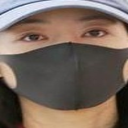

In [ ]:
X_train[0]

In [ ]:
X_train_scaled[0]

array([[[0.80784314, 0.82745098, 0.90196078],
        [0.81960784, 0.83921569, 0.91372549],
        [0.81960784, 0.84313725, 0.91764706],
        ...,
        [0.6627451 , 0.67843137, 0.70588235],
        [0.73333333, 0.74509804, 0.76862745],
        [0.80784314, 0.81960784, 0.83921569]],

       [[0.82352941, 0.84313725, 0.9254902 ],
        [0.83529412, 0.85490196, 0.93333333],
        [0.83921569, 0.8627451 , 0.94117647],
        ...,
        [0.67843137, 0.69019608, 0.7254902 ],
        [0.71764706, 0.72941176, 0.75294118],
        [0.76470588, 0.77647059, 0.8       ]],

       [[0.81568627, 0.83921569, 0.92941176],
        [0.81568627, 0.83921569, 0.93333333],
        [0.81176471, 0.83137255, 0.9254902 ],
        ...,
        [0.70980392, 0.72156863, 0.75686275],
        [0.70588235, 0.71764706, 0.74901961],
        [0.70980392, 0.72156863, 0.74901961]],

       ...,

       [[0.07058824, 0.07843137, 0.03921569],
        [0.07058824, 0.0745098 , 0.03529412],
        [0.07058824, 0

**Building a Convolutional Neural Networks (CNN)**

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
num_of_classes = 2
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [43]:
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 151s 881ms/step - loss: 0.5268 - acc: 0.7762 - val_loss: 0.2971 - val_acc: 0.8826
Epoch 2/5
170/170 [==============================] - 129s 759ms/step - loss: 0.2928 - acc: 0.8827 - val_loss: 0.2882 - val_acc: 0.8860
Epoch 3/5
170/170 [==============================] - 126s 739ms/step - loss: 0.2527 - acc: 0.8966 - val_loss: 0.2369 - val_acc: 0.9025
Epoch 4/5
170/170 [==============================] - 128s 755ms/step - loss: 0.2061 - acc: 0.9200 - val_loss: 0.2405 - val_acc: 0.9140
Epoch 5/5
170/170 [==============================] - 133s 781ms/step - loss: 0.1731 - acc: 0.9323 - val_loss: 0.2329 - val_acc: 0.9107


**Model Evaluation**

In [44]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 11s 228ms/step - loss: 0.2200 - acc: 0.9212
Test Accuracy = 0.921244204044342


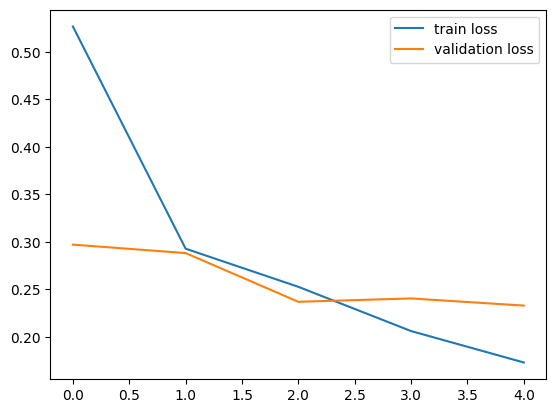

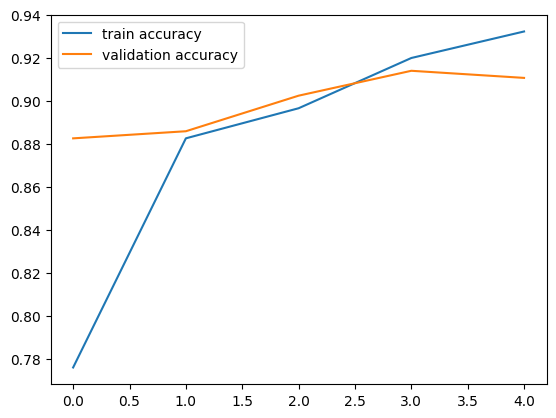

In [45]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

**Predictive System**

Path of the image to be predicted: /content/test.jpg


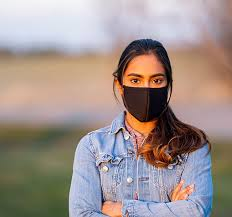

1/1 [==============================] - 0s 28ms/step
[[0.26806143 0.8290179 ]]
1
The person in the image is wearing a mask


In [51]:
input_image_path = input('Path of the image to be predicted: ')
input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)
input_image_resized = cv2.resize(input_image, (128,128))
input_image_scaled = input_image_resized/255
input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])
input_prediction = model.predict(input_image_reshaped)
print(input_prediction)
input_pred_label = np.argmax(input_prediction)
print(input_pred_label)
if input_pred_label == 1:
  print('The person in the image is wearing a mask')
else:
  print('The person in the image is not wearing a mask')